In [2]:
import os

import tqdm
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATA_ROOT = "../../raw/frog"
# FROG_H5 = os.path.join(DATA_ROOT, "frog_11-36_12-43_train_val.h5")
FROG_ODOM1 = os.path.join(DATA_ROOT, "frog_11-36_odom.npz")
FROM_ODOM2 = os.path.join(DATA_ROOT, "frog_12-43_odom.npz")

FROG_H5 = os.path.join(DATA_ROOT, "frog_14-57.h5")


In [4]:
hf = h5py.File(FROG_H5, "r")

In [5]:
list(hf.values())

[<HDF5 dataset "circle_idx": shape (70062,), type "<u4">,
 <HDF5 dataset "circle_num": shape (70062,), type "<u4">,
 <HDF5 dataset "circles": shape (133197, 6), type "<f4">,
 <HDF5 dataset "scans": shape (70062, 720), type "<f4">,
 <HDF5 dataset "timestamps": shape (70062,), type "<f8">]

In [6]:
scans = hf["scans"]
circle_idx = hf["circle_idx"]
circle_num = hf["circle_num"]
circles = hf["circles"]
timestamps = hf["timestamps"]

In [7]:
scans[0].tolist()

[inf,
 inf,
 inf,
 inf,
 inf,
 2.4070000648498535,
 2.433000087738037,
 2.4590001106262207,
 2.4809999465942383,
 2.819999933242798,
 2.8429999351501465,
 2.8429999351501465,
 2.8440001010894775,
 2.864000082015991,
 10.357000350952148,
 10.357000350952148,
 2.447000026702881,
 2.447000026702881,
 2.447000026702881,
 2.447000026702881,
 2.4630000591278076,
 2.4779999256134033,
 10.147000312805176,
 10.147000312805176,
 7.605000019073486,
 7.605000019073486,
 7.605000019073486,
 5.486000061035156,
 2.4779999256134033,
 2.4830000400543213,
 2.4830000400543213,
 2.4830000400543213,
 2.492000102996826,
 5.478000164031982,
 5.552999973297119,
 5.552999973297119,
 inf,
 inf,
 inf,
 inf,
 inf,
 2.502000093460083,
 2.510999917984009,
 2.5160000324249268,
 2.5190000534057617,
 34.433998107910156,
 34.435001373291016,
 34.441001892089844,
 34.529998779296875,
 34.5989990234375,
 34.5989990234375,
 34.5989990234375,
 2.562999963760376,
 2.549999952316284,
 2.549999952316284,
 2.549999952316284,
 

[[ 1.474      -2.125       0.4         2.586175   -0.9643468   0.15345263]]


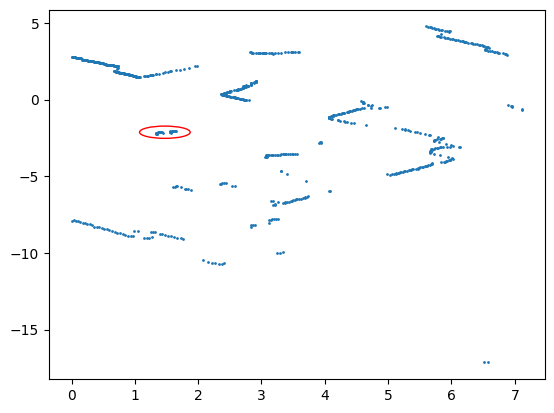

In [20]:
idx = 20000
x = scans[idx] * np.cos(np.linspace(-0.5 * np.pi, 0.5 * np.pi, scans.shape[1]))
y = scans[idx] * np.sin(np.linspace(-0.5 * np.pi, 0.5 * np.pi, scans.shape[1]))

idx = circle_idx[idx]
num = circle_num[idx]

cs = circles[idx:idx+num, :]
print(cs)

fig, ax = plt.subplots()
for i in range(cs.shape[0]):
    cx, cy, cr, _, _, _ = cs[i]
    ax.add_patch(plt.Circle((cx, cy), cr, fill=False, color='r'))
plt.plot(x, y, 'o', markersize=1)
plt.show()

In [15]:
odom1 = np.load(FROG_ODOM1)

In [10]:
odom1

NpzFile '../../raw/frog/frog_11-36_odom.npz' with keys: ts, data

In [11]:
odom1["data"].shape

(17746, 3)

In [12]:
odom1["data"][0]

array([0., 0., 0.], dtype=float32)

In [13]:
odom1["data"]

array([[  0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ],
       ...,
       [ 91.217    , -23.603    ,  -1.0995574],
       [ 91.217    , -23.603    ,  -1.0995574],
       [ 91.217    , -23.603    ,  -1.0995574]], dtype=float32)

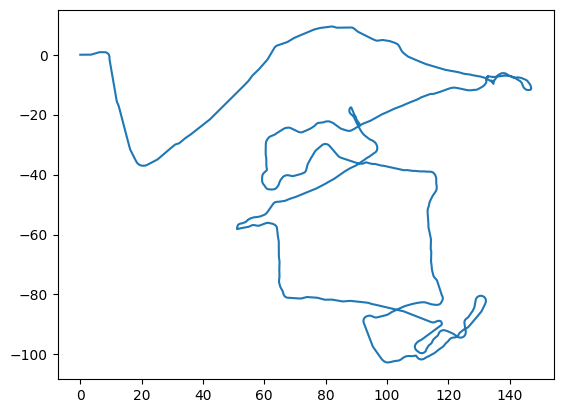

In [14]:
# Plot the trajectory
fig, ax = plt.subplots()
ax.plot(odom1["data"][:, 0], odom1["data"][:, 1])
plt.show()

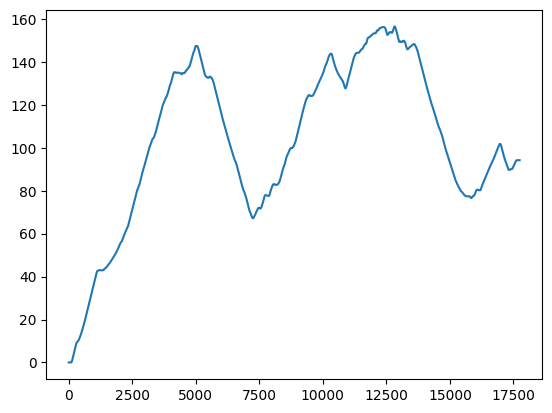

In [16]:
# Plot the trajectory
fig, ax = plt.subplots()
ax.plot(np.sqrt(odom1["data"][:, 0]**2 + odom1["data"][:, 1]**2))
plt.show()

In [18]:
events = []
for i in range(scans.shape[0]):
    events.append((timestamps[i], "scan", i, ""))
for i in range(odom1["data"].shape[0]):
    events.append((odom1["ts"][i], "odom", i, odom1["data"][i]))
events = sorted(events, key=lambda x: x[0])

In [19]:
len(events)

138142

In [20]:
events[1100:1500]

[(1398764248.4055789, 'scan', 464, ''),
 (1398764248.4238229,
  'odom',
  636,
  array([ 11.899    , -15.569    ,  -1.3264502], dtype=float32)),
 (1398764248.445606, 'scan', 465, ''),
 (1398764248.445627, 'scan', 466, ''),
 (1398764248.4856498, 'scan', 467, ''),
 (1398764248.490761, 'scan', 468, ''),
 (1398764248.5237384,
  'odom',
  637,
  array([ 11.912    , -15.617    ,  -1.3264502], dtype=float32)),
 (1398764248.5296419, 'scan', 469, ''),
 (1398764248.5696266, 'scan', 470, ''),
 (1398764248.5696619, 'scan', 471, ''),
 (1398764248.6096933, 'scan', 472, ''),
 (1398764248.6153004, 'scan', 473, ''),
 (1398764248.6240695,
  'odom',
  638,
  array([ 11.924    , -15.666    ,  -1.3089969], dtype=float32)),
 (1398764248.6536026, 'scan', 474, ''),
 (1398764248.6936412, 'scan', 475, ''),
 (1398764248.6936715, 'scan', 476, ''),
 (1398764248.7240603,
  'odom',
  639,
  array([ 11.938    , -15.714    ,  -1.2740904], dtype=float32)),
 (1398764248.733685, 'scan', 477, ''),
 (1398764248.7399426, 's